In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import neurokit2 as nk
import scipy
from scipy import signal

In [11]:
def cargar_y_procesar_senal(archivo, columna, Fs):
    array = np.genfromtxt(archivo, delimiter="\t", skip_header=3, missing_values=0)
    senal = array[:, columna]
    Ts = 1 / Fs
    n = len(senal)
    t = np.arange(0, n * Ts, Ts)
    return t, senal 

In [41]:
t_eeg, signaleeg = cargar_y_procesar_senal("eeg2.txt", 5, Fs=100)

Fs=100

In [42]:
"delta band"
N = 1000  # Number of order
wc1 = 2 / (Fs * 2)  # I choose to extract the theta band
wc2 = 4 / (Fs * 2)

k = np.arange(0, N / 2 + 1)  # It can be sampled because the number of orders is even
wk = 2 * k / N
a = ((wk < wc2) & (wk > wc1)).astype(np.int8)
h = scipy.signal.firwin(N + 1, [wc1, wc2], pass_zero=False)

Delta_band = scipy.signal.lfilter(h, 1, signaleeg)

# Calculate RMS (Root Mean Square)
rms_delta = np.sqrt(np.mean(Delta_band**2))

# Calculate Total Amplitude
amplitude_delta = np.max(Delta_band) - np.min(Delta_band)

# Calculate Area under the curve
area_delta = np.trapz(Delta_band)

# Calculate Power
power_delta = np.mean(Delta_band**2)

# Calculate Minimum and Maximum values
min_value_delta = np.min(Delta_band)
max_value_delta = np.max(Delta_band)

# Calculate Mean
mean_delta = np.mean(Delta_band)

# Calculate Median
median_delta = np.median(Delta_band)

print("RMS (Delta):", rms_delta)
print("Amplitude (Delta):", amplitude_delta)
print("Area (Delta):", area_delta)
print("Power (Delta):", power_delta)
print("Min Value (Delta):", min_value_delta)
print("Max Value (Delta):", max_value_delta)
print("Mean (Delta):", mean_delta)
print("Median (Delta):", median_delta)



RMS (Delta): 94.50647445610065
Amplitude (Delta): 612.1406769193003
Area (Delta): -46292.18034126827
Power (Delta): 8931.473714121605
Min Value (Delta): -300.62750057943884
Max Value (Delta): 311.51317633986145
Mean (Delta): -1.9022682731587148
Median (Delta): -1.5033480406501438


In [43]:
"Theta band"
N = 1000  # Number of order
wc1 = 4 / (Fs * 2)  # I choose to extract the theta band
wc2 = 8 / (Fs * 2)

k = np.arange(0, N / 2 + 1)  # It can be sampled because the number of orders is even
wk = 2 * k / N
a = ((wk < wc2) & (wk > wc1)).astype(np.int8)
h = scipy.signal.firwin(N + 1, [wc1, wc2], pass_zero=False)

Theta_band = scipy.signal.lfilter(h, 1, signaleeg)

rms_theta = np.sqrt(np.mean(Theta_band**2))

# Calculate Total Amplitude
amplitude_theta = np.max(Theta_band) - np.min(Theta_band)

# Calculate Area under the curve
area_theta = np.trapz(Theta_band)

# Calculate Power
power_theta = np.mean(Theta_band**2)

# Calculate Minimum and Maximum values
min_value_theta = np.min(Theta_band)
max_value_theta = np.max(Theta_band)

# Calculate Mean
mean_theta = np.mean(Theta_band)

# Calculate Median
median_theta = np.median(Theta_band)

# Print or use the calculated features as needed
print("RMS (Theta):", rms_theta)
print("Amplitude (Theta):", amplitude_theta)
print("Area (Theta):", area_theta)
print("Power (Theta):", power_theta)
print("Min Value (Theta):", min_value_theta)
print("Max Value (Theta):", max_value_theta)
print("Mean (Theta):", mean_theta)
print("Median (Theta):", median_theta)

RMS (Theta): 120.66136917059256
Amplitude (Theta): 1098.1652909475802
Area (Theta): 8775.98121524784
Power (Theta): 14559.166010122024
Min Value (Theta): -561.7515279891095
Max Value (Theta): 536.4137629584706
Mean (Theta): 0.362150922885128
Median (Theta): 0.11151513748442732


In [44]:
"Alpha band"
N = 1000  # Number of order
wc1 = 8 / (Fs * 2)  # I choose to extract the theta band
wc2 = 16 / (Fs * 2)

k = np.arange(0, N / 2 + 1)  # It can be sampled because the number of orders is even
wk = 2 * k / N
a = ((wk < wc2) & (wk > wc1)).astype(np.int8)
h = scipy.signal.firwin(N + 1, [wc1, wc2], pass_zero=False)

Alpha_band = scipy.signal.lfilter(h, 1, signaleeg)

# Calculate RMS (Root Mean Square)
rms_alpha = np.sqrt(np.mean(Alpha_band**2))

# Calculate Total Amplitude
amplitude_alpha = np.max(Alpha_band) - np.min(Alpha_band)

# Calculate Area under the curve
area_alpha = np.trapz(Alpha_band)

# Calculate Power
power_alpha = np.mean(Alpha_band**2)

# Calculate Minimum and Maximum values
min_value_alpha = np.min(Alpha_band)
max_value_alpha = np.max(Alpha_band)

# Calculate Mean
mean_alpha = np.mean(Alpha_band)

# Calculate Median
median_alpha = np.median(Alpha_band)

# Print or use the calculated features as needed
print("RMS:", rms_alpha)
print("Amplitude:", amplitude_alpha)
print("Area:", area_alpha)
print("Power:", power_alpha)
print("Min Value:", min_value_alpha)
print("Max Value:", max_value_alpha)
print("Mean:", mean_alpha)
print("Median:", median_alpha)

RMS: 98.69379311767219
Amplitude: 956.549858565587
Area: 4909.512016034322
Power: 9740.464799953877
Min Value: -465.8390776118922
Max Value: 490.7107809536948
Mean: 0.20152426606283289
Median: -0.07605527804048215


In [45]:
"Beta band"
N = 1000  # Number of order
wc1 = 16 / (Fs * 2)  # I choose to extract the theta band
wc2 = 32 / (Fs * 2)

k = np.arange(0, N / 2 + 1)  # It can be sampled because the number of orders is even
wk = 2 * k / N
a = ((wk < wc2) & (wk > wc1)).astype(np.int8)
h = scipy.signal.firwin(N + 1, [wc1, wc2], pass_zero=False)

Beta_band = scipy.signal.lfilter(h, 1, signaleeg)

# Calculate RMS (Root Mean Square)
rms_beta = np.sqrt(np.mean(Beta_band**2))

# Calculate Total Amplitude
amplitude_beta = np.max(Beta_band) - np.min(Beta_band)

# Calculate Area under the curve
area_beta = np.trapz(Beta_band)

# Calculate Power
power_beta = np.mean(Beta_band**2)

# Calculate Minimum and Maximum values
min_value_beta = np.min(Beta_band)
max_value_beta = np.max(Beta_band)

# Calculate Mean
mean_beta = np.mean(Beta_band)

# Calculate Median
median_beta = np.median(Beta_band)

# Print or use the calculated features as needed
print("RMS:", rms_beta)
print("Amplitude:", amplitude_beta)
print("Area:", area_beta)
print("Power:", power_beta)
print("Min Value:", min_value_beta)
print("Max Value:", max_value_beta)
print("Mean:", mean_beta)
print("Median:", median_beta)

len(Beta_band)

RMS: 71.19396442856822
Amplitude: 698.793876747614
Area: 2481.1602398238015
Power: 5068.580571056237
Min Value: -356.3168469358411
Max Value: 342.4770298117729
Mean: 0.10145766242445436
Median: 0.1958478155714387


24345

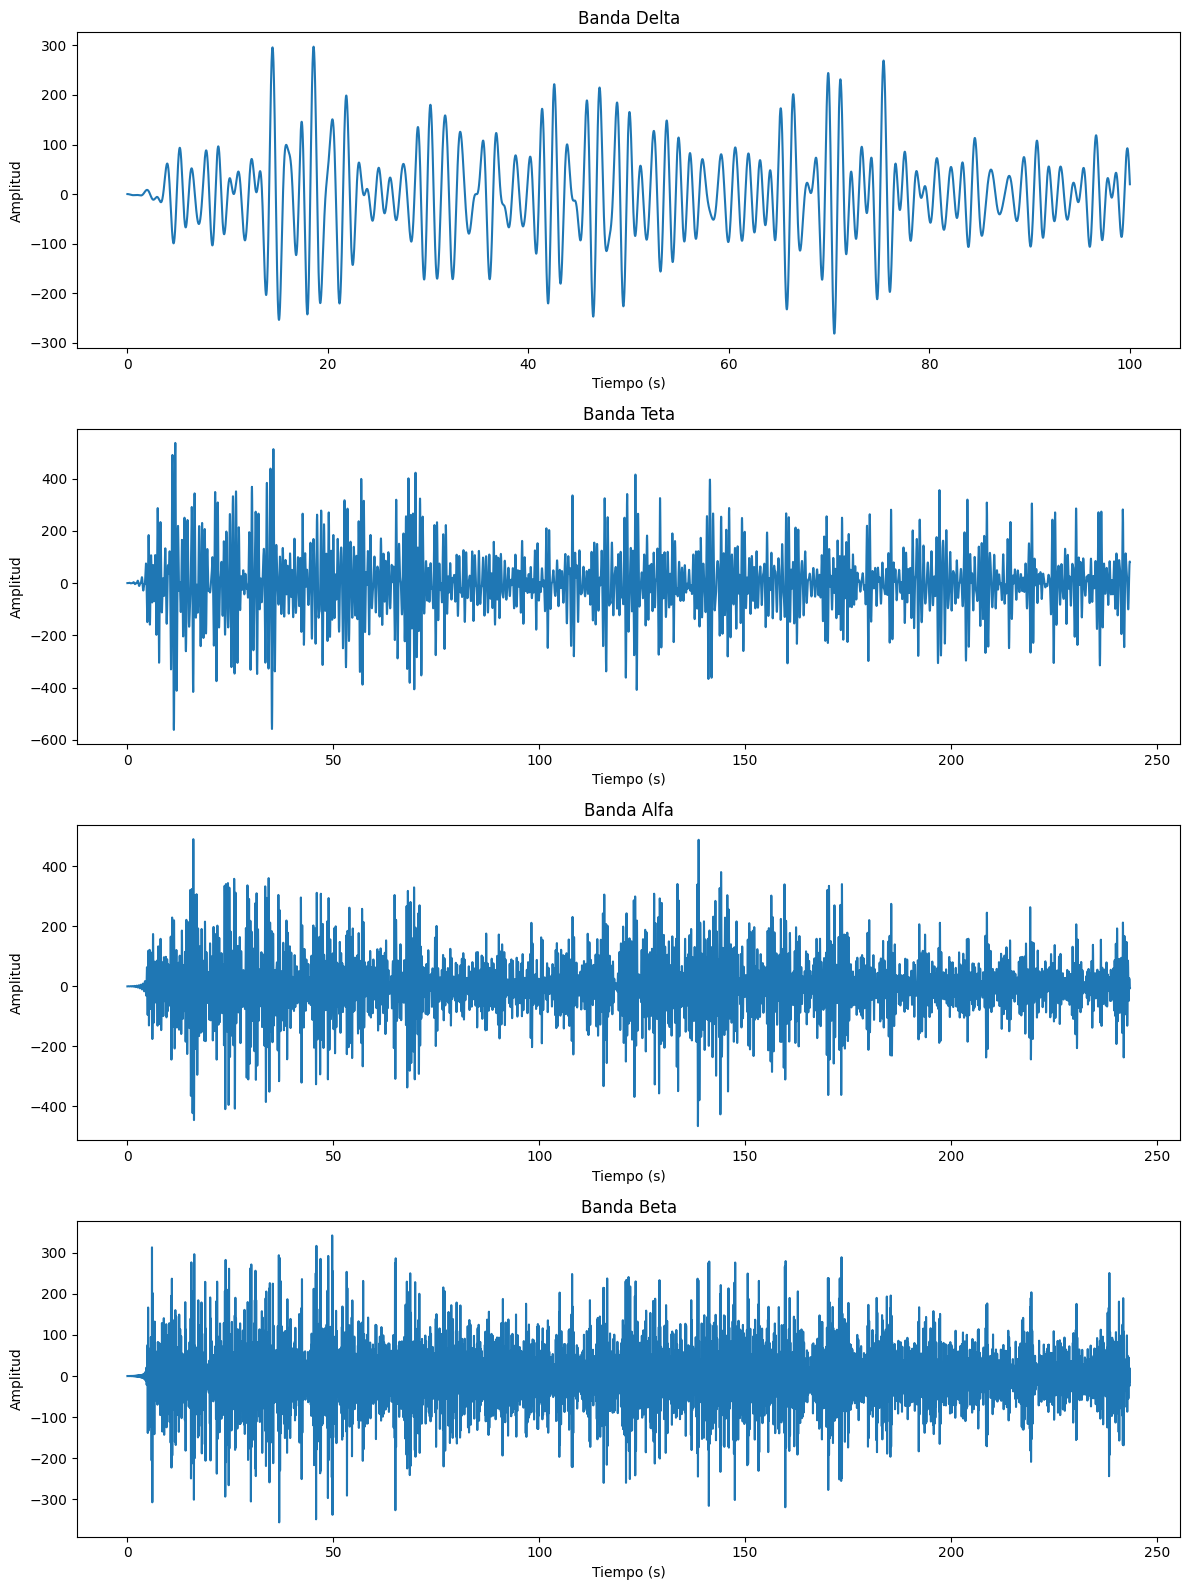

In [46]:
plt.figure(figsize=(12, 16))
plt.subplot(411)
plt.plot(t_eeg[0:10000],Delta_band[0:10000])
plt.title("Banda Delta")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.tight_layout()

plt.subplot(412)
plt.plot(t_eeg,Theta_band)
plt.title("Banda Teta")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.tight_layout()

plt.subplot(413)
plt.plot(t_eeg,Alpha_band)
plt.title("Banda Alfa")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.tight_layout()

plt.subplot(414)
plt.plot(t_eeg,Beta_band)
plt.title("Banda Beta")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.tight_layout()